#**Distribution of Lifetime Gross Revenue PG Movies made by their MPAA rating - Chinmayee Channuri**

I am attempting to understand the relationship between the MPAA ratings given to PG movies versus the Lifetime Gross Revenues they have made.  The Motion Picture Association, or MPAA,  film rating system is used in the United States to rate a motion picture's suitability in viewing for certain audiences. This includes G for general/all audiences, PG for parental guidance suggested, PG-13, may be inappropriate for children under 13, R for requires guardian if under 17, and NC-17 for adults only. The website I have used to scrape the data from organizes its data by the MPAA ranking system. But, I am interested to understand the nature of the distribution of the Lifetime Gross or Revenue a movie makes as their rank declines across the MPAA board. I have chosen specifically to stick to the PG rating for a hint of nostalgia!

I am achieving this goal by utilizing ETL—extract, transform, load—methodologies and create a data reserve, or CSV file.

I have used webscraping methods to extract data from an official IMDB website that aggregated over 1000+ movies and ranked them by their Lifetime Grosses/Revenues in USD. I have only extracted the first 200 rows as it would be sufficient to display any trends. Then, I transformed the data by checking for duplicates, clearing any possible noise, but most importantly, modifying the Lifetime Gross column to convert its data type using Lambda functions so we can manipulate it further. Lastly, I have loaded the transformed data frame into a CSV file to complete the last stage of the ETL cycle.

After the ETL methodologies, I have used matplotlib to create a line graph with the variables of interest from my data frame. The line graph showed a strong and sharp exponential decay in Lifetime Gross by as the Ratings/Ranking declined.



# **DATA EXTRACTION**

In [2]:
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import requests

url = "https://www.boxofficemojo.com/chart/mpaa_title_lifetime_gross/?by_mpaa=PG"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

movies_by_mpaa_rating = soup.find('table', attrs={'class': "a-bordered"})


movies_by_mpaa_rating_df = pd.read_html(str(movies_by_mpaa_rating))
movies_by_mpaa_rating_df = pd.DataFrame(movies_by_mpaa_rating_df[0])

movies_by_mpaa_rating_df

,Title,Rank,Lifetime Gross,Overall Rank,Year
0,Incredibles 2,1,"$608,581,744",14,2018
1,The Super Mario Bros. Movie,2,"$574,934,330",15,2023
2,The Lion King,3,"$543,638,043",16,2019
3,Beauty and the Beast,4,"$504,481,165",20,2017
4,Finding Dory,5,"$486,295,561",21,2016
...,...,...,...,...,...
195,The Lego Movie 2: The Second Part,196,"$105,956,290",722,2019
196,The First Wives Club,197,"$105,489,203",725,1996
197,George of the Jungle,198,"$105,263,257",729,1997
198,The Graduate,199,"$104,945,305",731,1967


# **DATA TRANFORMATION**

In [3]:
# checking and removing duplicates
number_of_duplicates = movies_by_mpaa_rating_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")
final_data = movies_by_mpaa_rating_df.drop_duplicates()
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")


# checking for noisy entries
movies_by_mpaa_rating_df.info()


 Number of duplicates before : 0
 Number of duplicates after removing : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           200 non-null    object
 1   Rank            200 non-null    int64 
 2   Lifetime Gross  200 non-null    object
 3   Overall Rank    200 non-null    int64 
 4   Year            200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


There are no noisy entries too, AKA null entries out of the 200 rows we are considering in our webscraped data set. But, we have encountered a problem here.

**The Lifetime Gross column in our data frame has the data type of an object, which is not a numerical value (Int/Float). Hence, we need to convert this column to a float variable so we can manipulate it and visualize it.**

In [4]:
# REMOVING COMMAS
# define a lambda function to first remove the commas in the dollar amounts of values
remove_commas = lambda x: x.replace(',','')

# apply the lambda function to the 'Lifetime Gross' column
movies_by_mpaa_rating_df["Lifetime Gross"] = movies_by_mpaa_rating_df["Lifetime Gross"].apply(remove_commas)

# REMOVING DOLLAR SIGN + CONVERTING TO FLOAT
# define a lambda function to first remove the dollar sign and convert to float data type
remove_dollar_sign = lambda x: float(x.replace('$',''))

# apply the lambda function to the 'Lifetime Gross' column
movies_by_mpaa_rating_df["Lifetime Gross"] = movies_by_mpaa_rating_df["Lifetime Gross"].apply(remove_dollar_sign)

# print the dataframe
print(movies_by_mpaa_rating_df)

                                 Title  Rank  Lifetime Gross  Overall Rank  \
0                        Incredibles 2     1     608581744.0            14   
1          The Super Mario Bros. Movie     2     574934330.0            15   
2                        The Lion King     3     543638043.0            16   
3                 Beauty and the Beast     4     504481165.0            20   
4                         Finding Dory     5     486295561.0            21   
..                                 ...   ...             ...           ...   
195  The Lego Movie 2: The Second Part   196     105956290.0           722   
196               The First Wives Club   197     105489203.0           725   
197               George of the Jungle   198     105263257.0           729   
198                       The Graduate   199     104945305.0           731   
199                         Phenomenon   200     104636382.0           733   

     Year  
0    2018  
1    2023  
2    2019  
3    2017  
4  

In [5]:
movies_by_mpaa_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           200 non-null    object 
 1   Rank            200 non-null    int64  
 2   Lifetime Gross  200 non-null    float64
 3   Overall Rank    200 non-null    int64  
 4   Year            200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


Now that we are satisfied with our data after extraction and tansformation stages, let's load it into a CSV.

# **DATA LOADING**

In [9]:
movies_by_mpaa_rating_df.to_csv("MPAA ratings of PG movies by Lifetime Gross.csv")

In [10]:
# filter to two columns
rank_of_movies = movies_by_mpaa_rating_df["Rank"]
lifetime_gross = movies_by_mpaa_rating_df["Lifetime Gross"]

# rank_of_movies
lifetime_gross

lifetime_gross.describe()

count    2.000000e+02
mean     1.954078e+08
std      9.943689e+07
min      1.046364e+08
25%      1.245221e+08
50%      1.628925e+08
75%      2.355047e+08
max      6.085817e+08
Name: Lifetime Gross, dtype: float64

Some important points to note from teh descriptive statstics above for the Lifetime Gross:
1. The median is smaller than the mean, which suggests that the data is right skewed.
2. The average is much lower than the maximum, which also suggests a heavy presence of outliers.

Further analysis will be discussed below.

Text(0.5, 1.0, 'MPAA Rank of top 200 PG movies versus the Gross Revenue they made in their Lifetime')

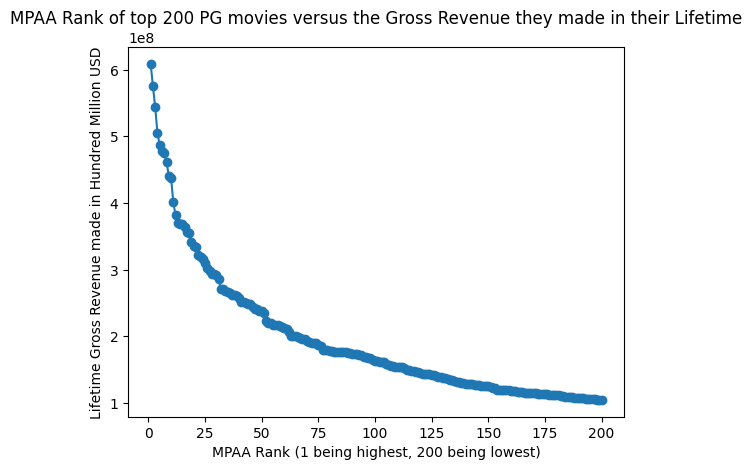

In [11]:
plt.plot(rank_of_movies,lifetime_gross, marker='o')

plt.xlabel("MPAA Rank (1 being highest, 200 being lowest)")
plt.ylabel("Lifetime Gross Revenue made in Hundred Million USD")

plt.title("MPAA Rank of top 200 PG movies versus the Gross Revenue they made in their Lifetime")

In the line graph above, we have plotted the MPAA Rank received by the movie on the x-axis, and the Lifetime Gross Revenue on the y-axis. Since our independent variable is a rank, we have to remember that 1 is the highest rank, and 200 is the lowest rank—so even though the ranking is increasing, it's technically decreasing. We can observe a strong and sharp exponential decay in the trend of the line graph here. As the MPAA rank increases, we see that the Lifetime Gross the movie has made decreasing. We can tell its exponential decay since for movies with ranks between 0-25, their revenue ranged from over 600 Million USD to 300 Million USD, but then for movies with ranks from 25-200, their revenue range was much smaller, from around 300 Million to around 100 Million.

Apart from the general expected trend, the concentration of data is also interesting to observe here. We can view that most of the data markers are concentrated on towards the bottom, or how most of them after the 25th Rank, have revenues lower than 300 Million USD. This makes me curious about the Spread of the Lifetime Gross as well.

If we observe the Descriptive Statistics for the Lifetime Gross above, we can view that the difference between the 75th quartile at 235 Million USD is much smaller than the maximum revenue earnt at 608 Million USD. We can further visualize this using a boxplot.






Text(0, 0.5, 'Lifetime Gross in Hundred Million USD')

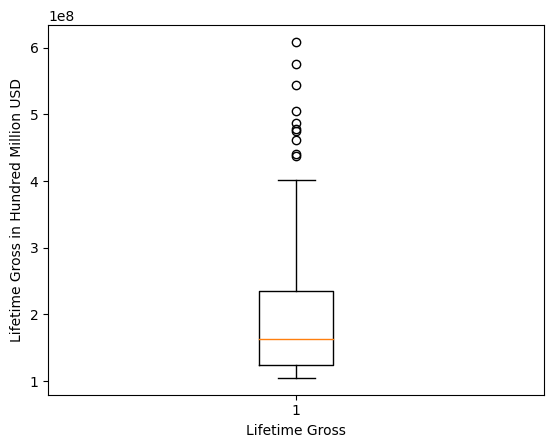

In [13]:
plt.boxplot(lifetime_gross)

plt.xlabel("Lifetime Gross")
plt.ylabel("Lifetime Gross in Hundred Million USD")

The Boxplot above for the Lifetime Gross does substantially provide more evidence for our findings from the line plot. The data points over 400 Million USD are all considered to be outliers as seen in the boxplot. Moreover, the 3rd quartile is much smaller than the maximum revenue earnt as discussed above. This goes to show that the PG movies earning revenues over around 400 Million is often unusual, and must be considered a grand success for the movie team. I have achieved my goal in analyzing the trends in Lifetime Gross. 